# Investigating Firearm Background Checks Per Capita for Each State

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project will load the data from the FBI NICS database as well as data from the U.S. Census.  Both tables will be wrangled and cleaned up in the following section to analyze how many background checks were done per capita for each state.  The first two graphs in the exploratory section will graph the relationship between population and background checks for each state regarding all background checks and background checks done excluding permit checks.  The final two bar graphs will illustrate the top twenty states that have the highest per capita background checks with and without permit background checks.  The reason for the two graphs is that Kentucky is the only state that does repeated permit background checks once a month for any person that has a carry permit.  The first bar graph will show Kentucky being the highest per capita because of this.

>Import Statements, the project uses pandas, matplotlib.pyplot and matplotlib.patches

In [1]:
# Import statements

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling and Cleaning

### FBI NICS Data Wrangling

These next sections will load the gun_data.csv file.  The following blocks of code in this section will do the following:

   1.  Loads the gun_data csv file and shows the first five lines of the dataframe
   2.  Converts the month column to date-time format and shows the first lines of the dataframe after the conversion
   3.  Shows all null values present
   4.  Fills all null values with 0
   5.  Converts permit_recheck column values to integers
   6.  Converts permit column values to integers
   7.  Checks to ensure there are no nulls present as well as permit columns are integers
   8.  Adds a total_no_permit_check column by taking the totals column and subtracting the sum of the permit_recheck
       column and the permit column
   9.  Drops all columns with the exception of the month, state, totals, and total_no_permit_check column and then shows
       the first few lines of the remaining columns
       

>Loading FBI NICS gun data csv file.

In [2]:
df_gun = pd.read_csv('gun_data.csv')
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


>The next block will convert the month column to datetime format.  This will be used later to query two separate gun_data dataframes.  It also shows the data that is available from November 1998 to September 2017

In [3]:
df_gun['month'] = pd.to_datetime(df_gun['month'])
df_gun

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11-01,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11-01,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11-01,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11-01,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


>This block will use the info() method to show null values, column headings, and datatypes

In [4]:
#showing null values for the dataset as well as datatypes
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

>The next block will fill all values with 0 as the columns that contain null values have numeric data.

In [5]:
df_gun.fillna('0', inplace=True)

>The next cell will convert the permit_recheck and the permit column to integers.

In [6]:
df_gun['permit_recheck'] = df_gun['permit_recheck'].astype(int)
df_gun['permit'] = df_gun['permit'].astype(int)

>The next block will verify that no null values exist and both permit and permit_recheck columns are integer datatypes

In [7]:
#showing datatypes and ensuring no null values exist 
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  int32         
 3   permit_recheck             12485 non-null  int32         
 4   handgun                    12485 non-null  object        
 5   long_gun                   12485 non-null  object        
 6   other                      12485 non-null  object        
 7   multiple                   12485 non-null  int64         
 8   admin                      12485 non-null  object        
 9   prepawn_handgun            12485 non-null  object        
 10  prepawn_long_gun           12485 non-null  object        
 11  prepawn_other              12485 non-null  object        
 12  rede

>The next block will create the the totals_no_permit_check column by taking the totals column and subtracting the sum of the permit column and the permit_recheck column

In [8]:
df_gun['totals_no_permit_check'] = df_gun['totals'] - (df_gun['permit'] + df_gun['permit_recheck'])

>This for loop will iterate 24 times and keep dropping the third column.  This results in leaving the month, state, totals, and totals_no_permit_check column in the df_gun dataframe.  The head() method will show the resulting dataframe

In [9]:
for x in range (24):
    df_gun.drop(df_gun.columns[2], axis =1, inplace = True)
df_gun.head()

,month,state,totals,totals_no_permit_check
0,2017-09-01,Alabama,32019,15302
1,2017-09-01,Alaska,6303,6092
2,2017-09-01,Arizona,28394,22943
3,2017-09-01,Arkansas,17747,14180
4,2017-09-01,California,123506,65667


### U.S. Census Data

The following blocks of code will load the U.S. census csv file.  The following blocks of code will do the following:

  1.  Loads the census_data.csv file and loads the first five lines of the dataframe
  2.  Shows all columns, datatypes, and existence of null values
  3.  Shows the shape of the dataframe
  4.  Shows the last 25 rows to investigate how null values are placed on the dataframe and where possible
      relevant data might be located
  5.  Drops the Fact Note column as it is unnecessary for analysis and has null values
  6.  Drops all other null values present in the dataframe
  7.  Shows the shape again after nulls are removed
  8.  Explores the first 35 rows in the dataframe to look at fact values
  9.  Explores the final 30 rows in the dataframe to look at fact values
  10. Trims off all rows with the exception of the rows containing 'Population Estimates'.  These two rows are the
      only relevant rows in trying to find per capita background checks.  This results in showing the population estimates 
      for 2010 and 2016.  
  11. Renames Fact column with Year column
  12. Iterates through each of the state columns and removes the commas from each of the values as well as convert that
      value to an integer.  After the loop is done, it displays the dataframe after the conversion.
  13. Replaces the description in the Year column to reflect the respective year in that row.
  14. Creates population list for 2010
  15. Creates population list for 2016

>Loading census data and displaying the first five lines

In [10]:
df_census = pd.read_csv('census_data.csv')
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


>The next block will check for null values, column headers and datatypes

In [11]:
#Checking for null values, column headers, and datatypes
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

>The following block will get the dimensions of the dataframe

In [12]:
df_census.shape

(85, 52)

>Comparing the amount of rows and observing the non-null values present in the state columns, the next cell will look at the last 25 rows of the dataframe to examine what the null values are as well as the rows where they are at.

In [13]:
df_census.tail(25)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>Observing the last 25 rows, row number 64 shows where data is not null with the exception of the fact note column.  The next block will drop the Fact Note column as well as remove the rest of the rows that contain null values.

In [14]:
df_census = df_census.drop('Fact Note', axis=1)
df_census = df_census.dropna()

> The next block will show the shape of the modified dataframe after nulls are removed


In [15]:
df_census.shape

(65, 51)

>The next two blocks will explore the entire dataframe starting with the first 35 rows of the dataframe and then showing the last 30 rows of the dataframe.  The column that will be observed is the Fact column.  The purpose of this is to find any relevant rows that will help answer the question regarding finding the state with the highest per capita firearm related background checks

In [16]:
df_census.head(35)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [17]:
df_census.tail(30)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
35,"Bachelor's degree or higher, percent of person...",23.50%,28.00%,27.50%,21.10%,31.40%,38.10%,37.60%,30.00%,27.30%,...,0.27,0.249,27.60%,31.10%,36.00%,36.30%,32.90%,19.20%,27.80%,25.70%
36,"With a disability, under age 65 years, percent...",11.80%,8.10%,8.20%,12.30%,6.80%,7.20%,7.10%,8.50%,8.50%,...,0.084,0.112,8.10%,6.60%,10.00%,7.70%,8.90%,14.40%,8.20%,8.50%
37,"Persons without health insurance, under age 6...",10.70%,15.50%,11.90%,9.30%,8.30%,8.60%,5.70%,6.60%,15.30%,...,0.103,0.106,18.60%,9.70%,4.50%,10.10%,6.90%,6.50%,6.20%,13.40%
38,"In civilian labor force, total, percent of pop...",58.00%,67.70%,59.30%,58.50%,63.10%,67.60%,67.20%,63.10%,58.80%,...,0.686,0.61,64.30%,67.70%,66.60%,64.70%,63.50%,53.90%,67.10%,67.70%
39,"In civilian labor force, female, percent of po...",53.00%,65.00%,54.50%,53.30%,57.20%,62.60%,62.80%,59.40%,54.70%,...,0.646,0.563,57.70%,59.50%,63.60%,60.80%,58.50%,49.20%,63.50%,62.70%
40,"Total accommodation and food services sales, 2...","7,576,462","2,221,335","13,996,635","4,307,264","90,830,372","13,617,654","9,542,068","2,148,437","49,817,925",...,1873699,12499013,"54,480,811","4,789,281","1,564,272","17,795,901","14,297,278","4,036,333","10,303,256","1,644,844"
41,Total health care and social assistance receip...,"26,039,632","6,375,483","37,055,881","15,792,628","248,953,592","29,488,161","29,573,119","7,003,251","124,061,425",...,6211731,42383683,"145,035,130","14,521,857","4,457,996","47,705,003","43,966,889","12,259,395","40,680,625","3,291,478"
42,"Total manufacturers shipments, 2012 ($1,000)","124,809,759",D,"51,243,473","62,712,925","512,303,164","50,447,098","55,160,095","22,597,384","96,924,106",...,16882647,139960482,"702,603,073","50,046,429","9,315,494","96,389,872","131,530,601","24,553,072","177,728,926","10,783,794"
43,"Total merchant wholesaler sales, 2012 ($1,000)","57,746,565","5,216,303","69,437,272","31,256,110","666,652,186","77,034,971","161,962,244","5,628,914","252,626,608",...,20411059,111718421,"691,242,607","30,927,885","6,450,076","86,613,641","83,313,366","14,295,437","77,066,883","5,597,891"
44,"Total retail sales, 2012 ($1,000)","58,564,965","10,474,275","84,716,542","36,815,256","481,800,461","67,815,200","51,632,467","14,456,001","273,867,145",...,13791827,91641605,"356,116,376","38,024,486","9,933,751","110,002,385","118,924,049","22,637,923","78,201,822","9,446,043"


>After observing the Fact column, the only relevant data in regards to per capita background checks is the population estimate rows as well as the fourth row showing the population census for 2010.  Since the 2010 estimate was close to the actual population census that was recorded on April 1, 2010, it would suffice for the analysis.  As a result, the next block will trim the dataframe to two rows that contain the phrase "Population estimates"

In [18]:
df_census = df_census[df_census['Fact'].str.contains('Population estimates')]
df_census

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


>The next block will drop the fact column as it as done its job of finding what data can be used for the analysis.

In [19]:
df_census = df_census.drop('Fact', axis=1)
df_census

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


>The for loop will iterate through each column and remove any commas in the value then convert the string value to an integer.  After the loop is completed, it will display the result

In [20]:
#This for loop with iterate starting at one and finishing with the number of columns present in the dataframe.  The reason
#it starts at one as it is the first population value reflecting the population for Alabama.  It will go through each column
#and remove any commas in the value.  The next line will convert the string value into an integer.
#After the loop is finished, it will show the dataframe after the conversion.

for c in range(df_census.shape[1]):
    df_census.iloc[:,c] = df_census.iloc[:,c].str.replace(',','')
    df_census.iloc[:,c] = df_census.iloc[:,c].astype(int)
df_census

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,10310371,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,9688680,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767


>The next two blocks will create two different lists from the population numbers from each state in 2010 and 2016

In [21]:
pop_list_2010 = []
for x in range (50):
    pop_list_2010.append(df_census.iloc[1,x])

In [22]:
pop_list_2016 = []
for x in range (50):
    pop_list_2016.append(df_census.iloc[0,x])

### Splitting Gun Dataframe and Creating Two Dataframes to Reflect Census Data

This section will take the df_gun dataframe and then shrink it down to reflect the two years that were found in the census
dataframe.  It will create two new dataframes to show background checks done in 2010 as well as 2016.  It will then modify
the two dataframes by grouping up the month column by summing up the background check totals for the year.  Next, it will
add on the population lists that were created in the previous section.  Finally it will calculate the per capita value for
all background checks as well as background checks done excluding permit checks.

The following blocks of code will do the following:

  1.  Rename totals column to background_check_totals and show the dataframe
  2.  Create the df_gun_2010 dataframe from the dates 01-01-2010 to 12-01-2010
  3.  Create the df_gun_2016 dataframe from the dates 01-01-2016 to 12-01-2016
  4.  Creates mod_df_gun_2010 and groups df_gun_2010 data by state and takes the sum of all background checks done for
      each month of 2010
  5.  Creates mod_df_gun_2016 and groups df_gun_2016 data by state and takes the sum of all background checks done for 
      each month of 2016
  6.  Removes rows that are U.S. Territories in the 2010 dataframe
  7.  Removes rows that are U.S. Territories in the 2016 dataframe
  8.  Adds population list from 2010 to 2010 dataframe
  9.  Adds population list from 2016 to 2016 dataframe

>The next block renames the totals column to background_check_totals and shows the result afterward.

In [23]:
#renaming totals column to background_check_totals column to distinguish between the two totals columns

df_gun.rename(columns={'totals':'background_check_totals'}, inplace = True)
df_gun

,month,state,background_check_totals,totals_no_permit_check
0,2017-09-01,Alabama,32019,15302
1,2017-09-01,Alaska,6303,6092
2,2017-09-01,Arizona,28394,22943
3,2017-09-01,Arkansas,17747,14180
4,2017-09-01,California,123506,65667
...,...,...,...,...
12480,1998-11-01,Virginia,24,24
12481,1998-11-01,Washington,361,360
12482,1998-11-01,West Virginia,408,405
12483,1998-11-01,Wisconsin,241,241


>The next two cells will create the df_gun_2010 and the df_gun_2016 dataframes.  The first cell will query from January 2010 to January 2011.  The second one will query from January 2016 to January 2017.

In [24]:
df_gun_2010 = df_gun.query('month >= "2010-01-01" & month < "2011-01-01"')
df_gun_2010

,month,state,background_check_totals,totals_no_permit_check
4455,2010-12-01,Alabama,43266,42853
4456,2010-12-01,Alaska,7036,7036
4457,2010-12-01,Arizona,23942,21860
4458,2010-12-01,Arkansas,23821,21239
4459,2010-12-01,California,81522,56621
...,...,...,...,...
5110,2010-01-01,Virginia,22145,22145
5111,2010-01-01,Washington,27184,20544
5112,2010-01-01,West Virginia,11693,11667
5113,2010-01-01,Wisconsin,12734,12734


In [25]:
df_gun_2016 = df_gun.query('month >= "2016-01-01" & month < "2017-01-01"')
df_gun_2016

,month,state,background_check_totals,totals_no_permit_check
495,2016-12-01,Alabama,62014,35018
496,2016-12-01,Alaska,8786,8532
497,2016-12-01,Arizona,44887,35866
498,2016-12-01,Arkansas,29926,25940
499,2016-12-01,California,298161,236353
...,...,...,...,...
1150,2016-01-01,Virginia,44181,43657
1151,2016-01-01,Washington,58050,38362
1152,2016-01-01,West Virginia,18985,15607
1153,2016-01-01,Wisconsin,39561,30065


>The next two blocks will group df_gun_2010 and df_gun_2016 by state and will sum up the other two columns.  They will be named mod_df_gun_2010 and mod_df_gun_2016, respectively.  Each block will display the result of each dataframe.

In [26]:
mod_df_gun_2010 = df_gun_2010.groupby(['state'], as_index=False).sum()
mod_df_gun_2010

,state,background_check_totals,totals_no_permit_check
0,Alabama,308607,303986
1,Alaska,65909,65909
2,Arizona,206050,181299
3,Arkansas,191448,160143
4,California,816399,521147
5,Colorado,300820,287892
6,Connecticut,179595,88653
7,Delaware,19240,19240
8,District of Columbia,349,347
9,Florida,559347,559312


In [27]:
mod_df_gun_2016 = df_gun_2016.groupby(['state'], as_index=False).sum()
mod_df_gun_2016

,state,background_check_totals,totals_no_permit_check
0,Alabama,616947,325908
1,Alaska,87647,84526
2,Arizona,416279,323399
3,Arkansas,266014,203522
4,California,2377167,1340186
5,Colorado,540514,455427
6,Connecticut,317692,168743
7,Delaware,59430,50990
8,District of Columbia,875,731
9,Florida,1435340,1098254


>The next two cells will remove the District of Columbia as well as the other four U.S. territories that are in each dataframe (Guam, Mariana Islands, Puerto Rico, Virgin Islands)

In [28]:
mod_df_gun_2010.drop(8, axis=0, inplace=True)
mod_df_gun_2010.drop(11, axis=0, inplace=True)
mod_df_gun_2010.drop(21, axis=0, inplace=True)
mod_df_gun_2010.drop(41, axis=0, inplace=True)
mod_df_gun_2010.drop(49, axis=0, inplace=True)

In [29]:
mod_df_gun_2016.drop(8, axis=0, inplace=True)
mod_df_gun_2016.drop(11, axis=0, inplace=True)
mod_df_gun_2016.drop(21, axis=0, inplace=True)
mod_df_gun_2016.drop(41, axis=0, inplace=True)
mod_df_gun_2016.drop(49, axis=0, inplace=True)

>The next two blocks will append each of the population lists created from the census dataframe and then append on each of the two dataframes.

In [30]:
mod_df_gun_2010['state_pop_total'] = pop_list_2010

In [31]:
mod_df_gun_2016['state_pop_total'] = pop_list_2016

>The next two cells will create the per capita columns for 2010 used for the analysis in the next section.  It will calculate the background check per capita by taking the background check totals and dividing it by the state population of each state.  The second cell will take the no permit check total and divide that by the state population.

In [32]:
#creating bk_chk_per_capita column that takes the background check totals including permit checks and dividing
#it by the state population total in the modified 2010 dataframe

mod_df_gun_2010['bk_chk_per_capita'] = mod_df_gun_2010['background_check_totals'] / mod_df_gun_2010['state_pop_total']

In [33]:
#creating bk_chk_pc_no_permit column that takes the background check totals excluding permit checks and dividing
#it by the state population total in the modified 2010 dataframe

mod_df_gun_2010['bk_chk_pc_no_permit'] = mod_df_gun_2010['totals_no_permit_check'] / mod_df_gun_2010['state_pop_total']

>The next two blocks will do the same thing, but for the modified 2016 dataframe

In [34]:
#creating bk_chk_per_capita column that takes all the background check totals including permit checks and dividing
#it by the state population total in the modified 2016 dataframe

mod_df_gun_2016['bk_chk_per_capita'] = mod_df_gun_2016['background_check_totals'] / mod_df_gun_2016['state_pop_total']

In [35]:
#creating bk_chk_pc_no_permit column that takes the background check totals excluding permit checks and dividing
#it by the state population total in the modified 2016 dataframe

mod_df_gun_2016['bk_chk_pc_no_permit'] = mod_df_gun_2016['totals_no_permit_check'] / mod_df_gun_2016['state_pop_total']

>The next two blocks will show the cleaned dataframes that will be used in the analysis below

In [36]:
#displaying the first five rows of the modified 2010 dataframe

mod_df_gun_2016.head()

,state,background_check_totals,totals_no_permit_check,state_pop_total,bk_chk_per_capita,bk_chk_pc_no_permit
0,Alabama,616947,325908,4863300,0.126858,0.067014
1,Alaska,87647,84526,741894,0.118140,0.113933
2,Arizona,416279,323399,6931071,0.060060,0.046659
3,Arkansas,266014,203522,2988248,0.089020,0.068107
4,California,2377167,1340186,39250017,0.060565,0.034145


In [37]:
#displaying the first five rows of the modified 2016 dataframe

mod_df_gun_2016.head()

,state,background_check_totals,totals_no_permit_check,state_pop_total,bk_chk_per_capita,bk_chk_pc_no_permit
0,Alabama,616947,325908,4863300,0.126858,0.067014
1,Alaska,87647,84526,741894,0.118140,0.113933
2,Arizona,416279,323399,6931071,0.060060,0.046659
3,Arkansas,266014,203522,2988248,0.089020,0.068107
4,California,2377167,1340186,39250017,0.060565,0.034145


<a id='eda'></a>
## Exploratory Data Analysis


### What state has the highest amount of background checks per capita in 2010 and 2016

This section will illustrate the states that have the highest background check per capita in 2010 and 2016.  It will first
display two scatterplots showing the relationship between population and background checks.  For the most part, it will be fairly linear with a few outliers with Kentucky being one of the outliers on the first scatterplot.

The next set of graphs will illustrate the top 20 states that have the highest background check per capita.  The first one will show Kentucky being the highest state per capita that includes permit checks.  Removing the permit checks, it will show those top 20 states that have the highest per capita background check.

The following blocks of code will do the following:

  1.  Creates a scatterplot illustrating the relationship between state population and background checks including permit
      checks for both 2010 and 2016
  2.  Create a scatterplot illustrating the relationship between state population and background checks excluding permit
      checks for both 2010 and 2016
  3.  Creates a 2010a dataframe by sorting the bk_chk_per_capita column in descending order
  4.  Creates a 2016a dataframe by sorting the bk_chk_per_capita column in descending order
  5.  Creates a 2010b dataframe by sorting the bk_chk_pc_no_permit column in descending order
  6.  Creates a 2016b dataframe by sorting the bk_chk_pc_no_permit column in descending order
  7.  Creates a bar graph showing the top 20 states that includes permit background checks for both 2010 and 2016
  8.  Creates a bar graph showing the top 20 states that excludes permit background checks for both 2010 and 2016.

>The following scatterplot will use matplotlib to illustrate both the 2010 and 2016 background_check_totals (x-axis) and state_pop_totals (y-axis).  It will set the size with the height having the value of 6 and the length with 10.  The ticklabel line ensures the values on the x and y-axis are not in scientific notation.  The following three lines will give the graph a title as well as label the x and y-axis.  The next three lines create labels for the legend using matplotlib.mpaches while the third line displays the legend.

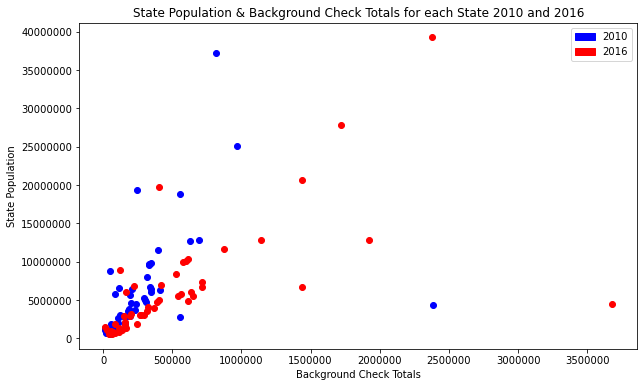

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(mod_df_gun_2010['background_check_totals'], mod_df_gun_2010['state_pop_total'], color='blue')
plt.scatter(mod_df_gun_2016['background_check_totals'], mod_df_gun_2016['state_pop_total'], color='red')
plt.ticklabel_format(axis='both', style='plain')
plt.title("State Population & Background Check Totals for each State 2010 and 2016")
plt.xlabel("Background Check Totals")
plt.ylabel("State Population")
patch_2010 = mpatches.Patch(color='blue', label='2010')
patch_2016 = mpatches.Patch(color='red', label='2016')
plt.legend(handles=[patch_2010, patch_2016]);

>The next scatterplot is similar to the previous scatterplot, but uses the background check totals excluding the permit checks.

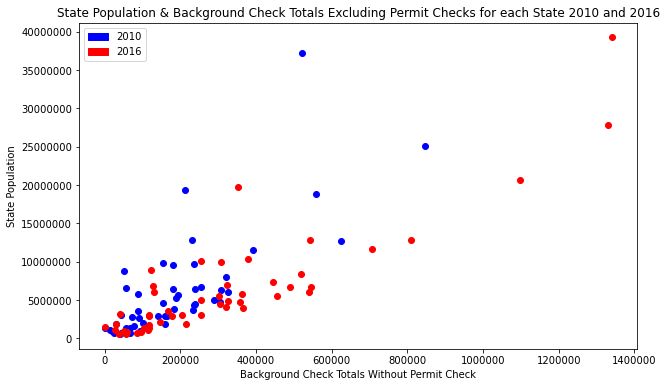

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(mod_df_gun_2010['totals_no_permit_check'], mod_df_gun_2010['state_pop_total'], color='blue')
plt.scatter(mod_df_gun_2016['totals_no_permit_check'], mod_df_gun_2016['state_pop_total'], color='red')
plt.ticklabel_format(axis='both', style='plain')
plt.title("State Population & Background Check Totals Excluding Permit Checks for each State 2010 and 2016")
plt.xlabel("Background Check Totals Without Permit Check")
plt.ylabel("State Population")
patch_2010 = mpatches.Patch(color='blue', label='2010')
patch_2016 = mpatches.Patch(color='red', label='2016')
plt.legend(handles=[patch_2010, patch_2016])

>The next four blocks will create four dataframes sorting values by background check per capita as well as background check per capita excluding permit checks for both 2010 and 2016.  The purpose of this is to see where Kentucky will be once permit checks are removed as well as comparing 2010 to 2016 in each of the bar graphs.

In [42]:
mod_df_gun_2010a = mod_df_gun_2010.sort_values(by = 'bk_chk_per_capita', ascending = False)
mod_df_gun_2010a = mod_df_gun_2010a[0:20]
mod_df_gun_2010a = mod_df_gun_2010a.reset_index(drop=True)
mod_df_gun_2010a

,state,background_check_totals,totals_no_permit_check,state_pop_total,bk_chk_per_capita,bk_chk_pc_no_permit
0,Kentucky,2385579,236241,4339344,0.549756,0.054442
1,Utah,553134,71571,2763888,0.200129,0.025895
2,Montana,101095,93238,989414,0.102177,0.094236
3,Alaska,65909,65909,710249,0.092797,0.092797
4,West Virginia,159550,159371,1853011,0.086103,0.086007
5,Wyoming,47709,41793,563767,0.084625,0.074132
6,South Dakota,63151,63151,814195,0.077563,0.077563
7,North Dakota,47083,43032,672591,0.070002,0.063979
8,Arkansas,191448,160143,2916025,0.065654,0.054918
9,Tennessee,411024,308084,6346298,0.064766,0.048545


In [43]:
mod_df_gun_2016a = mod_df_gun_2016.sort_values(by = 'bk_chk_per_capita', ascending = False)
mod_df_gun_2016a = mod_df_gun_2016a[0:20]
mod_df_gun_2016a = mod_df_gun_2016a.reset_index(drop=True)
mod_df_gun_2016a

,state,background_check_totals,totals_no_permit_check,state_pop_total,bk_chk_per_capita,bk_chk_pc_no_permit
0,Kentucky,3676847,304234,4436974,0.828683,0.068568
1,Indiana,1436725,489813,6633053,0.216601,0.073844
2,Illinois,1924070,541799,12801539,0.150300,0.042323
3,West Virginia,242350,215544,1831102,0.132352,0.117713
4,Montana,136337,115825,1042520,0.130776,0.111101
5,South Dakota,111921,95642,865454,0.129321,0.110511
6,Alabama,616947,325908,4863300,0.126858,0.067014
7,New Hampshire,165164,116817,1334795,0.123737,0.087517
8,Alaska,87647,84526,741894,0.118140,0.113933
9,Minnesota,651599,301284,5519952,0.118044,0.054581


In [44]:
mod_df_gun_2010b = mod_df_gun_2010.sort_values(by = 'bk_chk_pc_no_permit', ascending = False) 
mod_df_gun_2010b = mod_df_gun_2010b[0:20]
mod_df_gun_2010b = mod_df_gun_2010b.reset_index(drop=True)
mod_df_gun_2010b

,state,background_check_totals,totals_no_permit_check,state_pop_total,bk_chk_per_capita,bk_chk_pc_no_permit
0,Montana,101095,93238,989414,0.102177,0.094236
1,Alaska,65909,65909,710249,0.092797,0.092797
2,West Virginia,159550,159371,1853011,0.086103,0.086007
3,South Dakota,63151,63151,814195,0.077563,0.077563
4,Wyoming,47709,41793,563767,0.084625,0.074132
5,North Dakota,47083,43032,672591,0.070002,0.063979
6,Alabama,308607,303986,4780131,0.064560,0.063594
7,Oklahoma,233909,233909,3751615,0.062349,0.062349
8,Colorado,300820,287892,5029324,0.059813,0.057243
9,Mississippi,169873,166047,2968103,0.057233,0.055944


In [45]:
mod_df_gun_2016b = mod_df_gun_2016.sort_values(by = 'bk_chk_pc_no_permit', ascending = False)
mod_df_gun_2016b = mod_df_gun_2016b[0:20]
mod_df_gun_2016b = mod_df_gun_2016b.reset_index(drop=True)
mod_df_gun_2016b

,state,background_check_totals,totals_no_permit_check,state_pop_total,bk_chk_per_capita,bk_chk_pc_no_permit
0,West Virginia,242350,215544,1831102,0.132352,0.117713
1,Alaska,87647,84526,741894,0.118140,0.113933
2,Montana,136337,115825,1042520,0.130776,0.111101
3,South Dakota,111921,95642,865454,0.129321,0.110511
4,Wyoming,63594,55611,585501,0.108615,0.094980
5,Oklahoma,364590,364590,3923561,0.092923,0.092923
6,Missouri,632319,541347,6093000,0.103778,0.088847
7,New Hampshire,165164,116817,1334795,0.123737,0.087517
8,Mississippi,276161,253597,2988726,0.092401,0.084851
9,Colorado,540514,455427,5540545,0.097556,0.082199


>The following block of code displays the bar graph from the two sorted 2010 and 2016 dataframes sorted by background check per capita.

>The first line sets the width of the bars in the graph to 0.4
>The next four lines create four lists dealing with position on the x-axis for the 2010 data, the 2016 data, the x-axis ticker position for the state labels, and the fourth list is the state list for the top 20 states per capita.

>The first loop appends 20 values to set up positioning for the 2010 data as well as the 2016 data.

>The second loop iterates 40 times.  The first part checks if the remainder of the x value is 0.  If so, it appends the state from the 2010a list to the xtick_labels list as well as divide the x counter by half and appends that value the the x3_pos list.  If the modulus result is not zero, it will append the state from the 2016a list as well as append the value of half of the counter minus 0.1.  This will result in the tickers in the x-axis to be lined up with each bar in the graph.  Also, there will be a gap between each pair of bars.

>The next few lines will use matplotlib to display the bar graph.  The first line will set the height of the graph to 10 and the length to 15.  The next line will use the x_pos list created, place the value of the 2010a 'bk_chk_per_capita' there and set the width of the bar.  The following line will do the same, but using the x2_pos and the 2016a 'bk_chk_per_capita' value.  The next line sets the title of the graph.  The next line sets the xticks position as well as the label and sets the rotation of the labels to display vertically. The following line will label the y-axis, and the final line will display the legend showing which bar color is 2010 and 2016. 

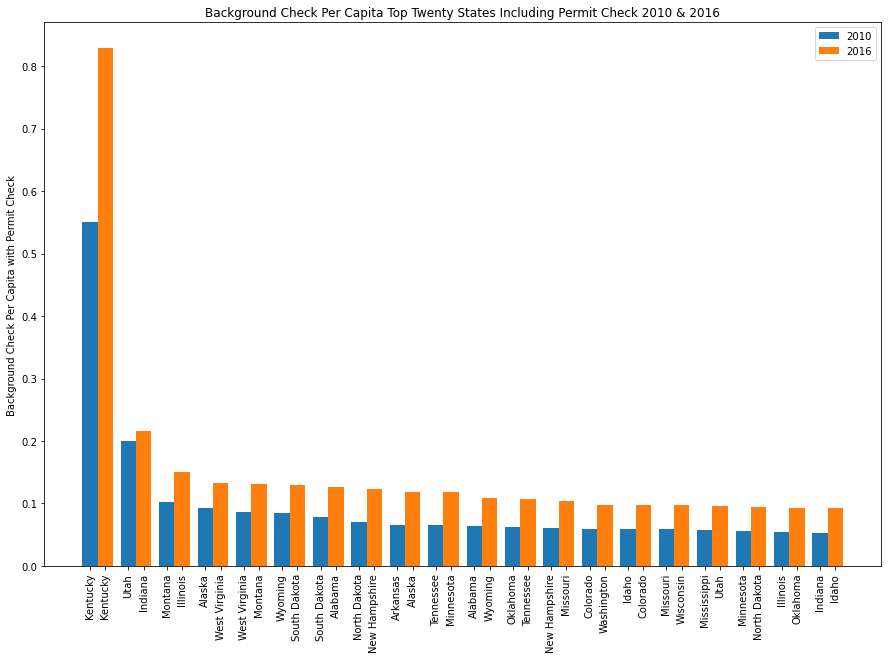

In [46]:
width=0.4
x_pos = []
x2_pos = []
x3_pos = []
xtick_labels = []
for x in range(20):
    x_pos.append(x)
    x2_pos.append(x+width)
for x in range(40):
    if x % 2 == 0:
        xtick_labels.append(mod_df_gun_2010a['state'][x/2])
        x3_pos.append(x/2)
    else:
        xtick_labels.append(mod_df_gun_2016a['state'][(x-1)/2])
        x3_pos.append((x/2) - 0.1)

plt.figure(figsize=(15,10))
plt.bar(x_pos, mod_df_gun_2010a['bk_chk_per_capita'], width)
plt.bar(x2_pos, mod_df_gun_2016a['bk_chk_per_capita'], width)
plt.title("Background Check Per Capita Top Twenty States Including Permit Check 2010 & 2016")
plt.xticks(x3_pos, xtick_labels, rotation='vertical')
plt.ylabel("Background Check Per Capita with Permit Check");
plt.legend(['2010', '2016'])
plt.show()

>This bar graph is similar to the previous one, but takes into account the per capita value without permit checks.  Also the following differences are noted:

>The xtick_labels is reset, but the x,x2, and x3_pos lists are kept the same

>The graph uses the 2010b and the 2016b dataframes using the background check per capita without permit column (bk_chk_pc_no_permit)



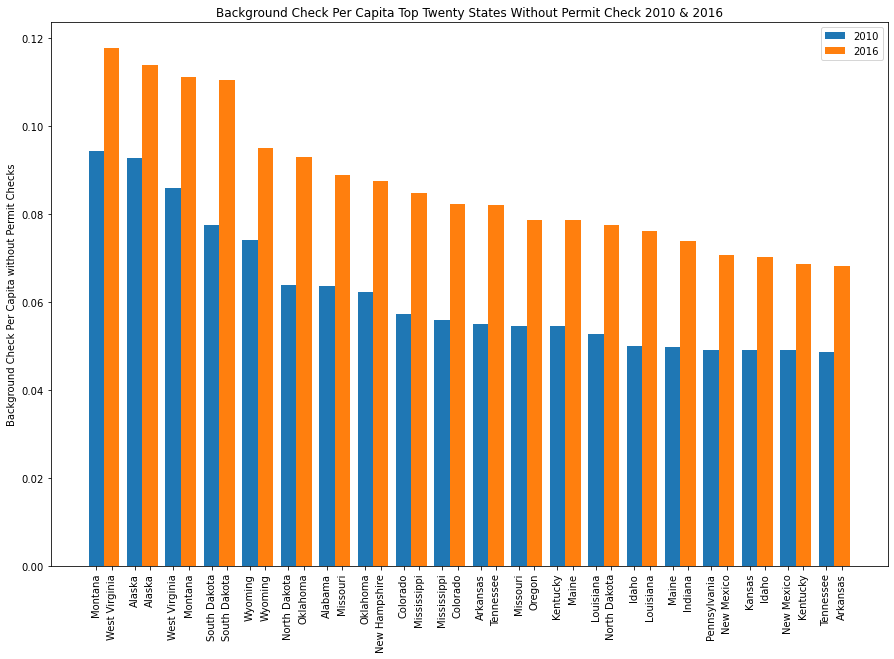

In [47]:
xtick_labels = []
for x in range(40):
    if x % 2 == 0:
        xtick_labels.append(mod_df_gun_2010b['state'][x/2])
    else:
        xtick_labels.append(mod_df_gun_2016b['state'][(x-1)/2])

plt.figure(figsize=(15,10))
plt.bar(x_pos, mod_df_gun_2010b['bk_chk_pc_no_permit'], width)
plt.bar(x2_pos, mod_df_gun_2016b['bk_chk_pc_no_permit'], width)
plt.title("Background Check Per Capita Top Twenty States Without Permit Check 2010 & 2016")
plt.xticks(x3_pos, xtick_labels, rotation='vertical')
plt.ylabel("Background Check Per Capita without Permit Checks");
plt.legend(['2010', '2016'])

<a id='conclusions'></a>
## Conclusion

> To answer the question regarding all background checks, then Kentucky is the highest state per capita in both years.  However, when removing that element, It shows Montana being the highest per capita in 2010 and West Virginia being the highest in 2016 for background checks that do not involve applying for a carry permit.  Kentucky is 13th place in 2010 for highest per capita removing permit checks and 19th in 2016.

>Using the data from the US census, the only two rows I could use is the population estimates from 2010 and 2016.  If I had more years available, more analysis could be done to see if this trend for Kentucky is true for other years (which I imagine it is).  As of 2016 at least, Kentucky is the only state that does monthly background checks.  This could change in the future whether Kentucky removes this requirement or other states adopt this.  Also, permit checks may go down as Kentucky is an open carry state, which means residents can carry without a permit if they are over 21.

>Another limiting factor is the fact that gun sales vs background checks are not a one to one correlation.  Background checks
are done whenever transferring ownership of a firearm whether it be a rental, a return, or an actual sale.  Also, it could 
mean the buyer could be buying multiple firearms simultaneously or if another person is picking up the firearm after the
background check is approved.  In the case of a different person picking up the firearm, that person may have to get a separate
background check.  Also, different states may or may not require background checks regarding private sales, if the person already has a carry permit, or other transactions.

>While the scatterplot shows almost a linear relationship between background checks versus state population, it doesn't
necessarily mean there is a direct correlation between population and background checks done.  The same person
could get a separate background check if he or she decides to buy another firearm from another location or at the same location, but at a different period of time whether it is two months later, two weeks later, or possibly two hours later.  Or in the case of Kentucky, that same person could have up to 12 different background checks done if that person has a carry permit in his/her possession despite not engaging in any transaction regarding obtaining a firearm.
